In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random_variable import RandomVariable, gaussian_distribution

Test random variable implementations

In [2]:
def test_var(var, n=1000):
    print(var)
    print(f"Expantacy(n={n}) = ", var.expantacy(n))
    print(f"Variance(n={n}) = ", var.variance(n))
    print(f"std(n={n}) = ", var.std(n))

In [3]:
print("Constante variable")
const = RandomVariable.constant_var(1,"1")
test_var(const)


Constante variable
1 :
   1
   1
   1
   1
Expantacy(n=1000) =  1.0
Variance(n=1000) =  0.0
std(n=1000) =  0.0


In [4]:
print("Random variable with normal law")
X = RandomVariable("X", gaussian_distribution(mu=-1.85, sigma=3.14))
test_var(X)

Random variable with normal law
X :
   2.5060043408974466
   -3.907770675351188
   -2.117430553844269
   6.488875323346408
Expantacy(n=1000) =  -1.81485747917121
Variance(n=1000) =  9.373800268345446
std(n=1000) =  3.0257205000642435


In [5]:
print("nuplet of the random variable above")
X_n = X.nuplet(3)
test_var(X_n)

nuplet of the random variable above
X_3 :
   [-1.14564973 -4.59390663 -0.62905121]
   [ 1.80019669 -3.03538101 -4.08710661]
   [ 1.18459226 -7.42512638  3.63440623]
   [-8.87417002 -0.42128786  0.43220754]
Expantacy(n=1000) =  [-1.67959073 -1.79295036 -1.73380722]
Variance(n=1000) =  [10.24967044  9.65865291  9.36929176]
std(n=1000) =  [3.24979095 3.25818765 3.17324432]


In [6]:
X_minus_X = X - X
test_var(X_minus_X)

X-X :
   2.3625834972319053
   2.319944446383533
   -10.233146881690923
   -6.273605116560763
Expantacy(n=1000) =  -0.0550642585014471
Variance(n=1000) =  19.741054455316483
std(n=1000) =  4.38287525936542


In [7]:
X_plus_X = X + X
test_var(X_plus_X)

X+X :
   2.0895083197065514
   -3.4142895107570017
   -2.0018495560520724
   1.4185200965579141
Expantacy(n=1000) =  -3.4418492840652433
Variance(n=1000) =  20.977632167156457
std(n=1000) =  4.320797629147849


In [8]:
X_pow_2 = X**2
test_var(X_pow_2)

X^2 :
   0.4455747737041517
   9.840276273900615
   5.538683280549353
   3.772669585972304
Expantacy(n=1000) =  13.331714876949924
Variance(n=1000) =  355.2010659093284
std(n=1000) =  17.101586196962288


Density Estimation

We use the **Kernel Method** to approximate the probability density function of a random variable.

$K: \mathbb{R} \to \mathbb{R_{+}}$ is a kernel function if:
- K is integrable
- K is even
- $\int_{\mathbb{R}}^{} K(x) \, dx = 1$

Let $h>0$. Then, $x \mapsto \frac{1}{h}K(\frac{x}{h})$ is a kernel. h is a scaling factor.

Approximate probability density is: $$\hat{f}(x) = \frac{1}{Nh}\sum_{i=1}^N K(\frac{x-x_i}{h})$$

In case of bivariate density approximation the formula is: $$\hat{f}(x,y) = \frac{1}{Nh_xh_y}\sum_{i=1}^N K(\frac{x-x_i}{h_x})K(\frac{y-y_i}{h_y})$$

Value of scaling factor $h$ in case of Gaussian kernel:
- Scott's method: $h=\sigma n^{-\frac{1}{5}}$
- Silverman's method: $h=0.9* \sigma n^{-\frac{1}{5}}$

Gaussian kernel: $$K(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left( -\frac{x^2}{2 \sigma^2} \right)$$


In [9]:
print("Random variable with normal law")
mu    = 0
sigma = 1

var = RandomVariable("X", gaussian_distribution(mu=mu, sigma=sigma))
print(var)

Random variable with normal law
X :
   0.5877077624808866
   0.5835391803050564
   2.174736187880823
   -0.09142515490064877


In [10]:
t = np.linspace(-4,4,500)
real_density = np.exp(-(t-mu)**2 / 2 / sigma**2) / np.sqrt(2 * np.pi) / sigma
gaussian_kernel = lambda x: np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

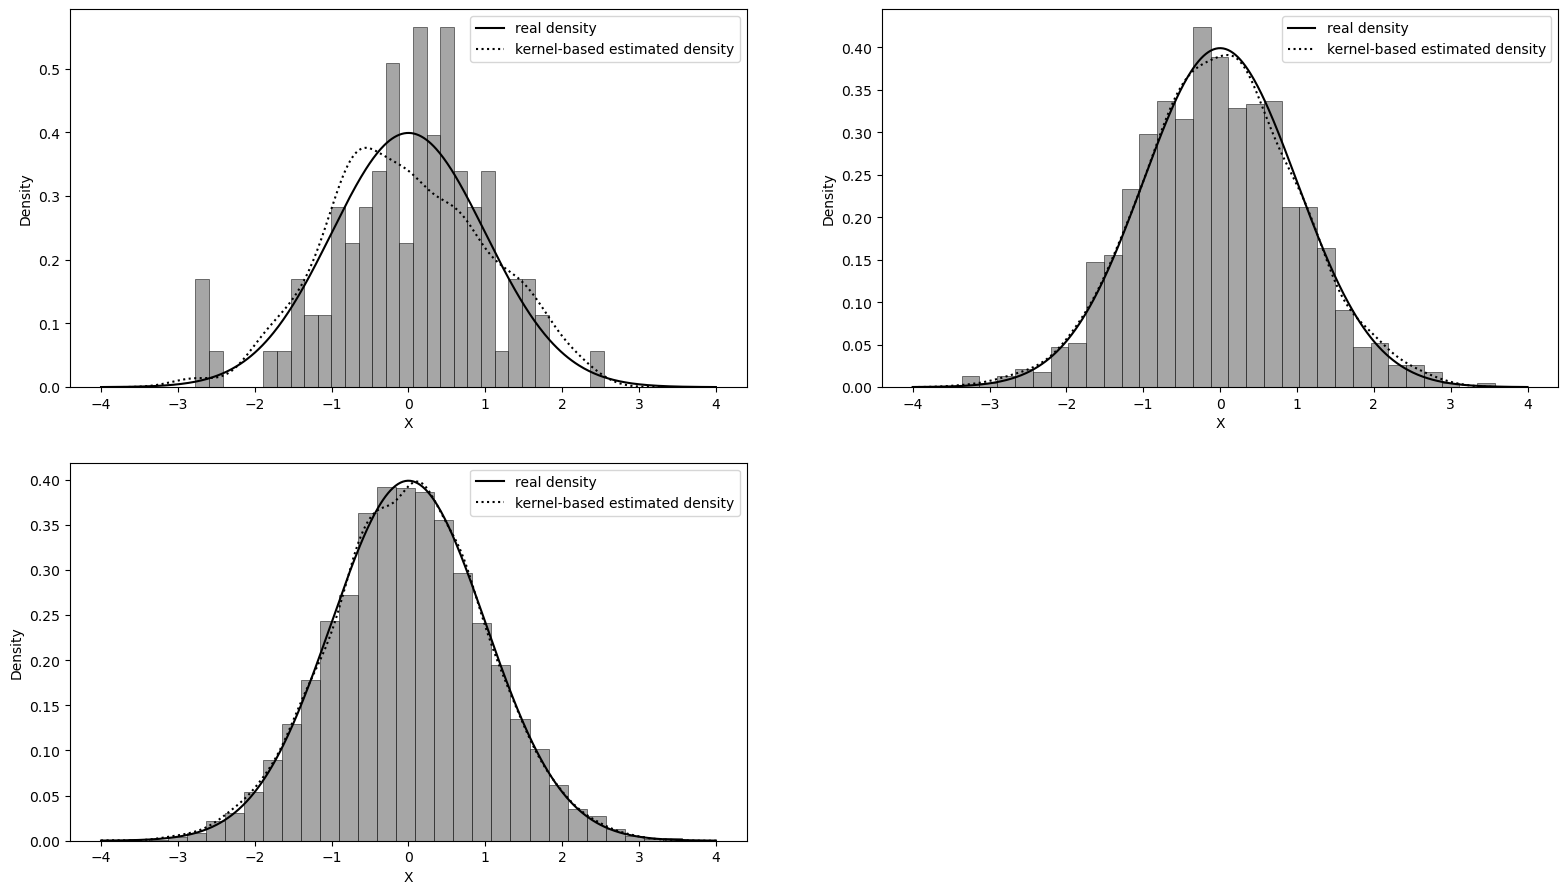

In [11]:
plt.figure(figsize=(19.20,10.80))
for i in range(1, 4):
    N = 10**(i+1)
    ax = plt.subplot(2,2,i)
    estimated_density = var.estimated_density(x=t, kernel=gaussian_kernel, n=N)
    ax.plot(t, real_density, c="black", label="real density")
    ax.plot(t, estimated_density, c="black", linestyle="dotted", label="kernel-based estimated density")
    var.plot(ax=ax, n=N)
    ax.legend()
plt.show()

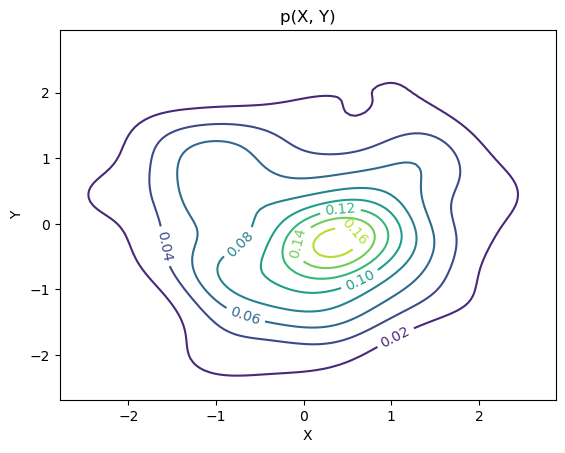

In [12]:
n = 100
var_x = RandomVariable("X", gaussian_distribution(mu=0, sigma=1))
var_y = RandomVariable("Y", gaussian_distribution(mu=0, sigma=1))
# var_y = 2*var_x + RandomVariable("Noise", gaussian_distribution(mu=0, sigma=1))
RandomVariable.get_bivariate_density(var_x=var_x, var_y=var_y, n=n)
plt.show()

Here the two variables are independant. Thus the contours are nearly circular or symmetric around the origin.

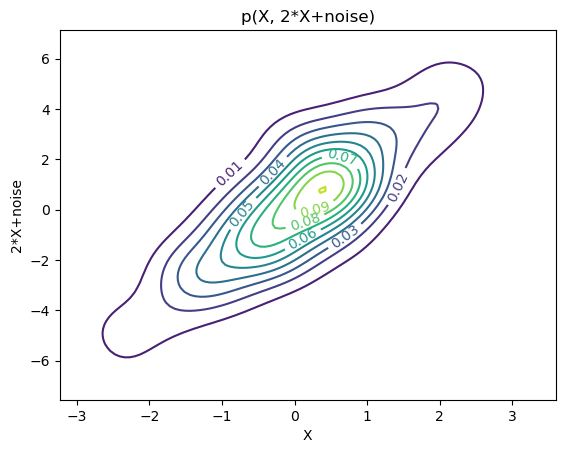

In [13]:
n = 100
x = np.random.normal(0,1,1000)
var_x = RandomVariable("X", lambda n: x[:n])
y = 2*x+np.random.normal(0,1,1000)
var_y = RandomVariable("2*X+noise", lambda n: y[:n])
RandomVariable.get_bivariate_density(var_x=var_x, var_y=var_y, n=n) # Positive correlation
plt.show()

Positive correlation: the contours slope from bottom-left to top-right, it suggests a positive relationship (when one variable increases, the other also increases).

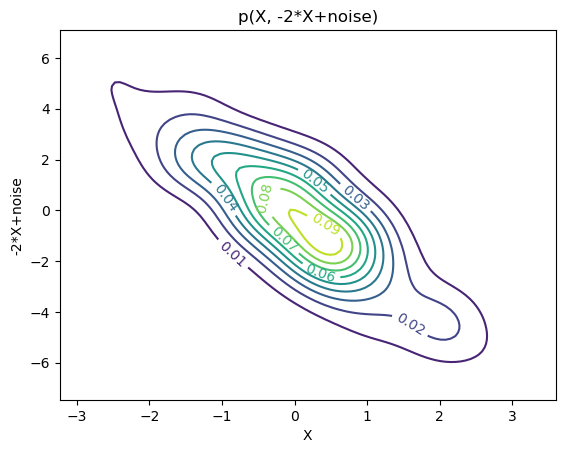

In [14]:
y = -2*x+np.random.normal(0,1,1000)
var_y = RandomVariable("-2*X+noise", lambda n: y[:n])
RandomVariable.get_bivariate_density(var_x=var_x, var_y=var_y, n=n) # Negative correlation
plt.show()

Negative correlation: the contours slope from top-left to bottom-right, it indicates a negative correlation (when one variable increases, the other decreases).

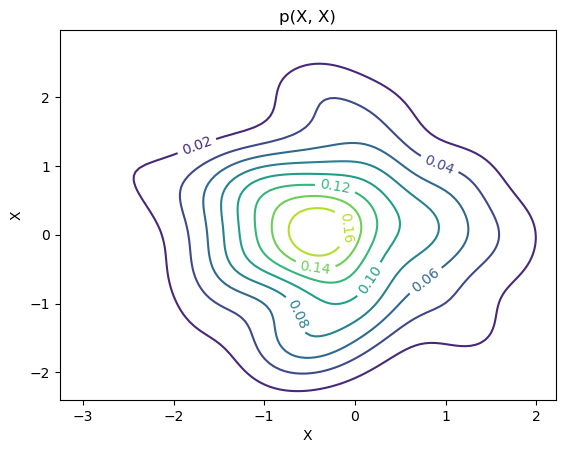

In [15]:
var_x = RandomVariable("X", gaussian_distribution(mu=0, sigma=1))
var_y = RandomVariable("X", gaussian_distribution(mu=0, sigma=1))
RandomVariable.get_bivariate_density(var_x=var_x, var_y=var_y, n=n) # No correlation
plt.show()

No apparent correlation: the contours are nearly circular or symmetric around the origin, it might suggest no correlation between the variables.

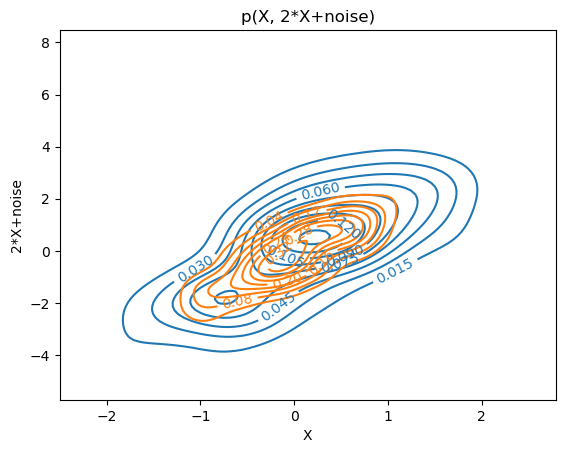

In [16]:
x = np.random.normal(0,1,1000)
var_x = RandomVariable("X", lambda n: x[:n])
y = 2*x+np.random.normal(0,1,1000)
var_y = RandomVariable("2*X+noise", lambda n: y[:n])
fig, ax = plt.subplots()
RandomVariable.get_bivariate_density(var_x=var_x, var_y=var_y, n=n, ax=ax, colors="#1f77b4")

x = np.random.normal(0,0.5,1000)
var_x = RandomVariable("X", lambda n: x[:n])
y = 2*x+np.random.normal(0,0.5,1000)
var_y = RandomVariable("2*X+noise", lambda n: y[:n])
RandomVariable.get_bivariate_density(var_x=var_x, var_y=var_y, n=n, ax=ax, colors="#ff7f0e")
plt.show()

**Wide contours** indicate that both variables have high variance.

**Narrow contours** suggest low variance or high concentration of data around specific values.

Diabete dataset

In [17]:
# # Get dataset from https://www.kaggle.com/datasets/mathchi/diabetes-data-set?resource=download
# df_init = pd.read_csv('diabetes.csv')
# df_init.rename(columns={'BloodPressure': 'Pressure', 'SkinThickness': 'Skin', 'DiabetesPedigreeFunction': 'Pedigree', 'Outcome':'Diabetes'}, inplace=True)
# features_to_cleanse = ['Glucose','Pressure','Skin','Insulin','BMI']
# df_init[features_to_cleanse] = df_init[features_to_cleanse].replace(0, np.nan)
# gaussian_kernel = lambda x: np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)
# # n = len(df)
# n = 100
# columns = df_init.columns[:-1]
# fig, axes = plt.subplots(8,8, figsize=(19.2, 10.8))

# for i in range(len(columns)):
#     for j in range(len(columns)):
#         var1 = columns[i]
#         var2 = columns[j]
#         if i!=j:
#             df = df_init.loc[:, [var1,var2]].dropna()
#         else: df = df_init.loc[:, [var1]].dropna()
#         var_x = RandomVariable(var1, distribution=lambda n: df[var1][:n].values, max_values=len(df[var1]))
#         var_y = RandomVariable(var2, distribution=lambda n: df[var2][:n].values, max_values=len(df[var2]))
#         plot = True
#         ax = axes[i, j]
#         if i==j:
#             plot = False
#         xx, yy, joint_density = RandomVariable.get_bivariate_density(var_x=var_x, var_y=var_y, n=n, ax=ax, plot=plot, method="scott")
#         if not plot: ax.plot(var_x.estimated_density(None, gaussian_kernel, n))
#         ax.set_title('')
#         ax.set_xlabel('')
#         ax.set_ylabel('')
#         ax.set_xticks([])
#         ax.set_yticks([])
# for i in range(len(columns)): axes[i,0].set_ylabel(columns[i])
# for i in range(len(columns)): axes[7,i].set_xlabel(columns[i])
# plt.show()

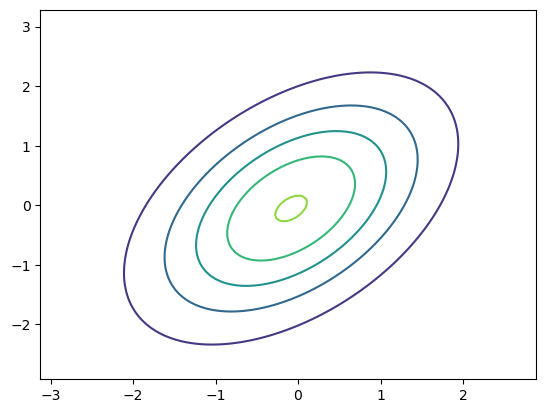

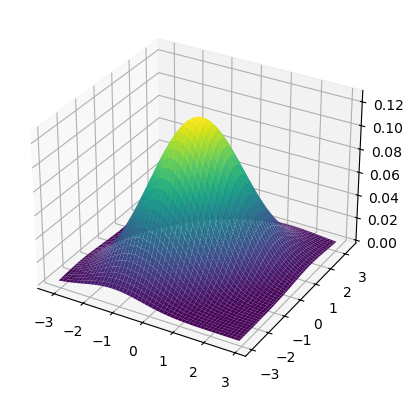

In [18]:
def multivariate_normal(n: int = 1000):
    mean=np.array([0,0])
    cov = np.array([[1, 0.5], [0.5, 1.75]])
    X = np.random.multivariate_normal(mean=mean, cov=cov, size=n)

    mins = X.min(axis=0)
    maxs = X.max(axis=0)
    mins -= 0.1
    maxs += 0.1

    x = np.linspace(mins[0], maxs[0], 100)
    y = np.linspace(mins[1], maxs[1], 100)
    xx, yy = np.meshgrid(x, y)

    mean_hat = X.mean(axis=0)
    cov_hat = np.cov(X.T)

    dim = X.shape[1]
    def kernel(x):
        func = lambda x: np.exp(-0.5 * (x-mean_hat).T@np.linalg.inv(cov_hat)@(x-mean_hat)) / (np.sqrt((2*np.pi)**dim * np.linalg.det(cov_hat)))
        return np.array([func(t) for t in x])


    # # kernel = scipy.stats.gaussian_kde(X.T, bw_method="scott")
    xy = np.vstack([xx.ravel(), yy.ravel()])
    densities = kernel(xy.T).reshape(xx.shape)
    # plt.scatter(X[:, 0], X[:, 1])
    plt.contour(xx, yy, densities, levels=5)
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(xx, yy, densities, cmap="viridis", edgecolor="none")
    plt.show()

multivariate_normal(100)